In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
BASE_LOCN = os.getcwd()
fname = os.path.join(BASE_LOCN, "lin_reg_data.csv")
print(fname)

C:\Users\gsshacha\Desktop\l4\lin_reg_data.csv


In [3]:
gdp_sat_df = pd.read_csv(fname)
gdp_sat_df.head(5)

,Country,GDP_per_capita,life_satisfaction
0,Afghanistan,1739.583177,4.220169
1,Albania,11424.628320,4.511101
2,Algeria,13974.666220,5.388171
3,Angola,6024.726138,NaN
4,Antigua and Barbuda,20777.613080,NaN


In [7]:
gdp_sat_df = gdp_sat_df.dropna()
X = gdp_sat_df["GDP_per_capita"]
y = gdp_sat_df["life_satisfaction"]
print(X.head(5))
print(y.head(5))

0     1739.583177
1    11424.628320
2    13974.666220
6    18479.442210
7     8174.366732
Name: GDP_per_capita, dtype: float64
0    4.220169
1    4.511101
2    5.388171
6    6.427221
7    4.325472
Name: life_satisfaction, dtype: float64


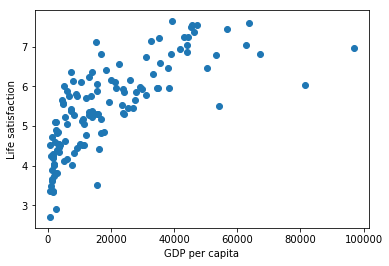

In [12]:
plt.scatter(X, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.show()

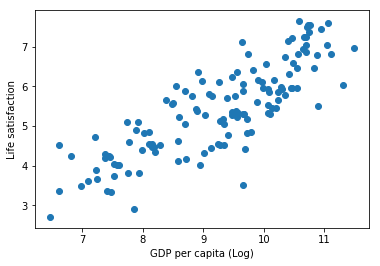

In [13]:
X1 = np.log(X)
plt.scatter(X1, y)
plt.xlabel("GDP per capita (Log)")
plt.ylabel("Life satisfaction")
plt.show()

In [16]:
gdp_sat_df["gdp_log"] = np.log(gdp_sat_df["GDP_per_capita"])
gdp_sat_df.index = range(gdp_sat_df.shape[0])
gdp_sat_df.head(5)

,Country,GDP_per_capita,life_satisfaction,gdp_log
0,Afghanistan,1739.583177,4.220169,7.461401
1,Albania,11424.628320,4.511101,9.343527
2,Algeria,13974.666220,5.388171,9.545001
3,Argentina,18479.442210,6.427221,9.824414
4,Armenia,8174.366732,4.325472,9.008759


In [20]:
lin_reg_model = LinearRegression()
X = gdp_sat_df["gdp_log"].reshape(gdp_sat_df["gdp_log"].shape[0], 1)
y = gdp_sat_df["life_satisfaction"]
lin_reg_model.fit(X, y)
print("Finished training")

Finished training


c:\users\gsshacha\appdata\local\continuum\anaconda3\envs\smenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [23]:
print("Coeficients are : {0}".format(lin_reg_model.coef_))
print("Intercept is : {0}".format(lin_reg_model.intercept_))

Coeficients are : [ 0.77437171]
Intercept is : -1.73612917534


In [24]:
# Prediction for Cyprus
X_new = [[22587]]
X_new_log = np.log(X_new)
print("Predicted Life expectancy of Cyprus is : {0}".format(lin_reg_model.predict(X_new_log)))

Predicted Life expectancy of Cyprus is : [ 6.0270477]
